In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import pickle
from gprofiler import GProfiler

In [2]:
def enrich(query, background, return_full=False, organism='hsapiens', sources=['GO:BP']):
    gp = GProfiler(return_dataframe=True, user_agent='g:GOSt')

    df = gp.profile(
        organism=organism, sources=sources, user_threshold=0.05,
        significance_threshold_method='fdr',
        background=list(background),
        query=list(query),
        no_evidences=False)

    if return_full:
        return df
    else:
        return df[['name', 'p_value', 'intersections']]

In [28]:
adata = ad.read_h5ad("../../tmp_dialogue_experiments/data/full/bs/uc-dialogue_pmd.h5ad")


OSError: Unable to open file (truncated file: eof = 3246391296, sblock->base_addr = 0, stored_eof = 14286937772)

In [25]:
adata = ad.read_h5ad("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_pmd.h5ad")
multilevel_results = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_multilevel-results", "rb")
)
multilevel_mcps = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_multilevel-mcps", "rb")
)

In [3]:
adata = ad.read_h5ad("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_pmd.h5ad")
multilevel_results = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_multilevel-results", "rb")
)
multilevel_mcps = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_multilevel-mcps", "rb")
)

In [7]:
genes = adata.var_names

In [5]:
sig_genes_fibro = multilevel_results['fibroblast_vs_epithelial']['MCP1']['sig_genes_1']['MCP1.down'] +  multilevel_results['fibroblast_vs_epithelial']['MCP1']['sig_genes_1']['MCP1.up']
sig_genes_immune = multilevel_results['immune_vs_fibroblast']['MCP1']['sig_genes_1']['MCP1.down']+ multilevel_results['immune_vs_fibroblast']['MCP1']['sig_genes_1']['MCP1.up']
sig_genes_epithelial = multilevel_results['immune_vs_epithelial']['MCP1']['sig_genes_2']['MCP1.down'] + multilevel_results['immune_vs_epithelial']['MCP1']['sig_genes_2']['MCP1.up']
all_sig_genes = sig_genes_fibro + sig_genes_immune + sig_genes_epithelial

In [8]:
pathway_df = enrich(all_sig_genes, genes)
pathway_df

,name,p_value,intersections
0,biological_process,2.481751e-17,"[FAM91A1, IKZF5, PIBF1, VPS13B, ABCA1, AGO3, A..."
1,cellular process,8.771925e-16,"[FAM91A1, IKZF5, PIBF1, VPS13B, ABCA1, AGO3, A..."
2,gene expression,3.625351e-12,"[IKZF5, PIBF1, AGO3, ARID4B, ATP8B1, ATXN7, BM..."
3,macromolecule metabolic process,3.625351e-12,"[IKZF5, PIBF1, ABCA1, AGO3, ARID4B, ATP8B1, AT..."
4,nitrogen compound metabolic process,4.614820e-12,"[IKZF5, PIBF1, ABCA1, AGO3, ARID4B, ATP6V1A, A..."
...,...,...,...
286,negative regulation of locomotion,4.559433e-02,"[ARID4B, MEF2C, PLCB1, GADD45A, MIA3, OSBPL8, ..."
287,negative regulation of cell death,4.622947e-02,"[BMI1, DAB2, FSTL1, GPNMB, IL6ST, MEF2C, YWHAZ..."
288,regulation of programmed cell death,4.641427e-02,"[BMI1, DAB2, FSTL1, IL6ST, MEF2C, SERINC3, YWH..."
289,regulation of phosphorylation,4.673929e-02,"[PIBF1, BMPR2, C3, DAB2, GPNMB, IL6ST, MAP3K13..."


### Gene Expression in selected Pathways

##### biological process

In [9]:
bio_process_genes = pathway_df['intersections'][0]

In [13]:
adata_subset = adata[:, bio_process_genes] 

/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


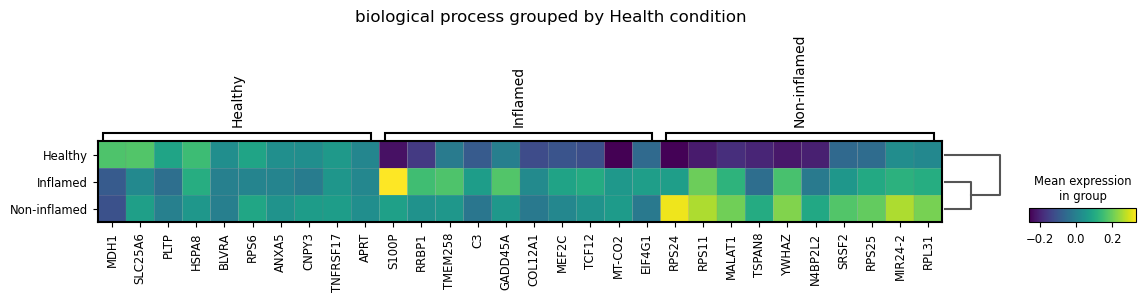

In [23]:
sc.tl.rank_genes_groups(adata_subset, 'Health', method='t-test')
sc.pl.rank_genes_groups_matrixplot(adata_subset, groupby='Health', title="biological process grouped by Health condition")

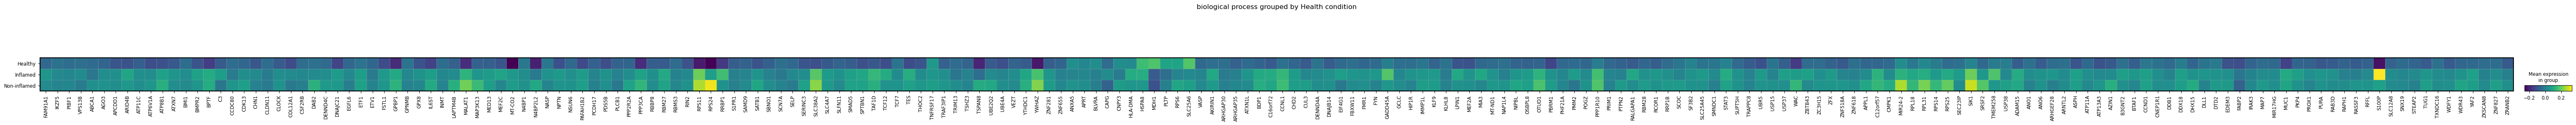

In [14]:
sc.pl.matrixplot(adata_subset, adata_subset.var_names, groupby='Health', title="biological process grouped by Health condition")

##### gene expression

/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


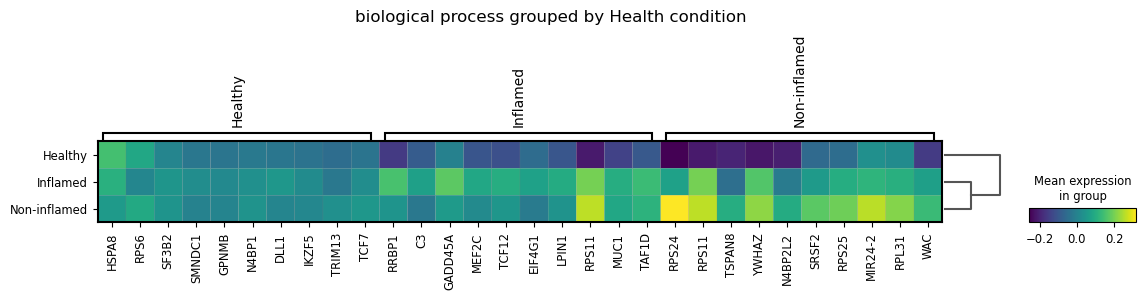

In [30]:
gene_expr_genes = pathway_df['intersections'][2]
adata_subset_2 = adata[:, gene_expr_genes] 
sc.tl.rank_genes_groups(adata_subset_2, 'Health', method='t-test')
sc.pl.rank_genes_groups_matrixplot(adata_subset_2, groupby='Health', title="biological process grouped by Health condition")

#### negative regulation of cellular process

/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


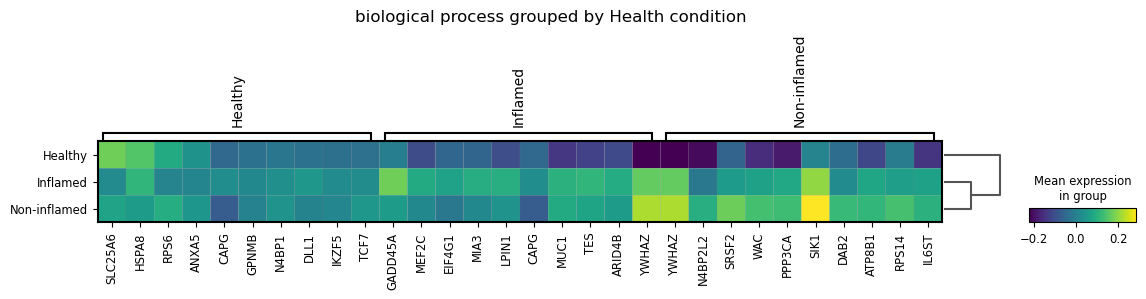

In [43]:
neg_reg_cell_process = pathway_df['intersections'][50]
adata_subset_3 = adata[:, neg_reg_cell_process] 
sc.tl.rank_genes_groups(adata_subset_3, 'Health', method='t-test')
sc.pl.rank_genes_groups_matrixplot(adata_subset_3, groupby='Health', title="biological process grouped by Health condition")

### Gene expression in all signifanct genes

In [16]:
adata_sig_genes = adata[:, list(set(all_sig_genes))] 


#### ranked by Health conditions

In [17]:
sc.tl.rank_genes_groups(adata_sig_genes, 'Health', method='t-test')

/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


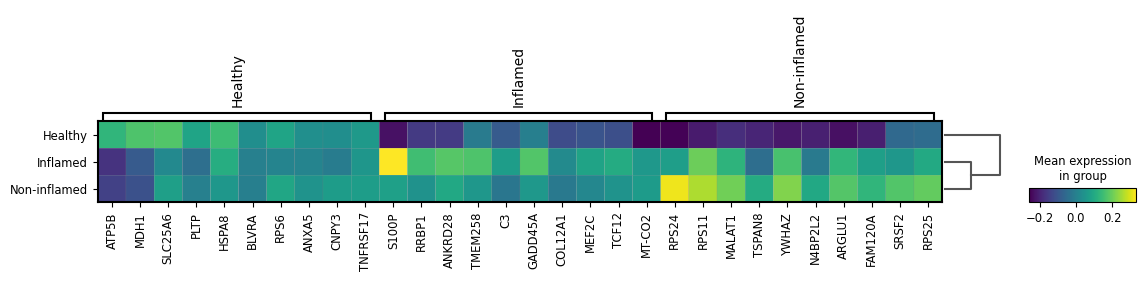

In [18]:
sc.pl.rank_genes_groups_matrixplot(
    adata_sig_genes
)

#### ranked by cell_type

categories: Healthy, Inflamed, Non-inflamed
var_group_labels: epithelial, fibroblast, immune


/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


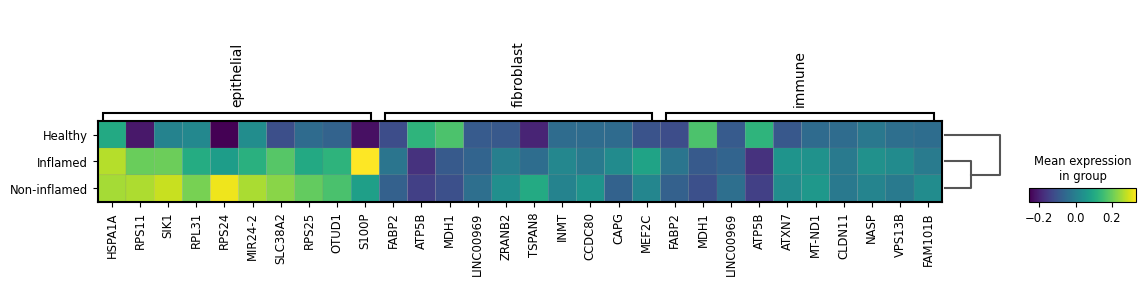

In [19]:
sc.tl.rank_genes_groups(adata_sig_genes, 'cell_type', method='t-test')
sc.pl.rank_genes_groups_matrixplot(
    adata_sig_genes,
    groupby='Health'
)